In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{border: 1px 
black solid ! important;color:black !important;}

In [2]:
from __future__ import print_function
from rdkit import Chem

In [3]:
%matplotlib inline
#%pylab inline
from IPython.display import Image
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

In [4]:
smi="CC(=O)OC1=CC=CC=C1C(=O)O"
m=Chem.MolFromSmiles(smi);

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize=(450,350)
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdqueries
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
rdDepictor.SetPreferCoordGen(True)
import pandas as pd

from IPython.display import SVG,Image
from ipywidgets import interact

import rdkit
print(rdkit.__version__)

2020.03.4


In [6]:
df = pd.read_csv('cdk2_rgd_dataset.csv')
df.head()

,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
0,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265814,68026,>,...,1,Ki,>,20.00,uM,NaN,NaN,RPXWUUDZINQPTJ-UHFFFAOYSA-N,CNc1nccc(n1)c2sc(C)nc2C,CHEMBL46474
1,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265817,67880,=,...,1,Ki,=,0.14,uM,NaN,NaN,GDZTURHUKDAJGD-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccc(O)cc3)n2,CHEMBL442957
2,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267078,67751,=,...,1,Ki,=,6.50,uM,NaN,NaN,CTFDMGIBHFQWKB-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(N)n2,CHEMBL47302
3,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267081,67782,=,...,1,Ki,=,1.20,uM,NaN,NaN,HOKDXVAONYXHJK-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccccc3F)n2,CHEMBL297447
4,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267084,67961,=,...,1,Ki,=,0.11,uM,NaN,NaN,XNKSRGHGPSHYIW-UHFFFAOYSA-N,CNc1nc(C)c(s1)c2ccnc(Nc3cccc(O)c3)n2,CHEMBL44119


In [7]:
df_doc1 = df[df.assay_chembl_id=='CHEMBL827377']
print(len(df_doc1));df_doc1.head()

91


,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
47,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1438958,305637,>,...,1,Ki,>,19.95,uM,NaN,NaN,TWQUOUJLNRGSRZ-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4cccc(c4)C(F)(F)F)n3)c(nn2n1...,CHEMBL182493
48,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1438962,305651,>,...,1,Ki,>,19.95,uM,NaN,NaN,CYHPFZLFUXOCJJ-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4ccc(F)c(F)c4)n3)c(nn2n1)c5c...,CHEMBL182326
49,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1439061,305664,>,...,1,Ki,>,19.95,uM,NaN,NaN,MYSOMHSTKVRJRA-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4ccc5OCCOc5c4)n3)c(nn2n1)c6c...,CHEMBL183064
50,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1439063,305674,>,...,1,Ki,>,19.95,uM,NaN,NaN,VUGNSTAXWJUVEZ-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4ccc(Cl)c(c4)C(F)(F)F)n3)c(n...,CHEMBL361038
51,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1439065,305687,=,...,1,Ki,=,3.98,uM,NaN,NaN,BWBMBCPGRIOUNV-UHFFFAOYSA-N,C1CC1c2nn3ncccc3c2c4ccnc(Nc5ccccc5)n4,CHEMBL362296


In [8]:
rdDepictor.SetPreferCoordGen(True)
smis = df_doc1['canonical_smiles']
cids = list(df_doc1.compound_chembl_id)
ms = [Chem.MolFromSmiles(x) for x in smis]
for m in ms:
    rdDepictor.Compute2DCoords(m)
#Draw.MolsToGridImage(ms[:12],legends=cids,molsPerRow=4)

In [9]:
df_doc2 = df[df.assay_chembl_id=='CHEMBL658107']
print(len(df_doc2));df_doc2.head()

33


,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
0,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265814,68026,>,...,1,Ki,>,20.00,uM,NaN,NaN,RPXWUUDZINQPTJ-UHFFFAOYSA-N,CNc1nccc(n1)c2sc(C)nc2C,CHEMBL46474
1,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265817,67880,=,...,1,Ki,=,0.14,uM,NaN,NaN,GDZTURHUKDAJGD-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccc(O)cc3)n2,CHEMBL442957
2,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267078,67751,=,...,1,Ki,=,6.50,uM,NaN,NaN,CTFDMGIBHFQWKB-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(N)n2,CHEMBL47302
3,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267081,67782,=,...,1,Ki,=,1.20,uM,NaN,NaN,HOKDXVAONYXHJK-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccccc3F)n2,CHEMBL297447
4,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267084,67961,=,...,1,Ki,=,0.11,uM,NaN,NaN,XNKSRGHGPSHYIW-UHFFFAOYSA-N,CNc1nc(C)c(s1)c2ccnc(Nc3cccc(O)c3)n2,CHEMBL44119


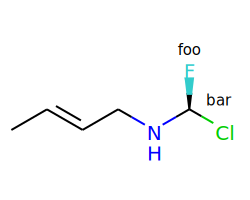

In [19]:
mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')
d = rdMolDraw2D.MolDraw2DSVG(250, 200)
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
#d.WriteDrawingText('atom_annotation_1.png')   
#mol = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
d2d = rdMolDraw2D.MolDraw2DSVG(250,200)
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [28]:
from rdkit.Chem import AllChem
alcohol1 = Chem.MolFromSmiles('CC(CCN)O')
alcohol2 = Chem.MolFromSmiles('C[C@H](CCN)O')
alcohol3 = Chem.MolFromSmiles('C[C@@H](CCN)O')
acid = Chem.MolFromSmiles('CC(=O)O')
rxn = AllChem.ReactionFromSmarts('[CH1:1][OH:2].[OH][C:3]=[O:4]>>[C:1][O:2][C:3]=[O:4]')
ps=rxn.RunReactants((alcohol1,acid))
Chem.MolToSmiles(ps[0][0],True)

'CC(=O)OC(C)CCN'

In [29]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN\
(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)\
CC1)Cc1ccc2ccccc2c1')

In [30]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

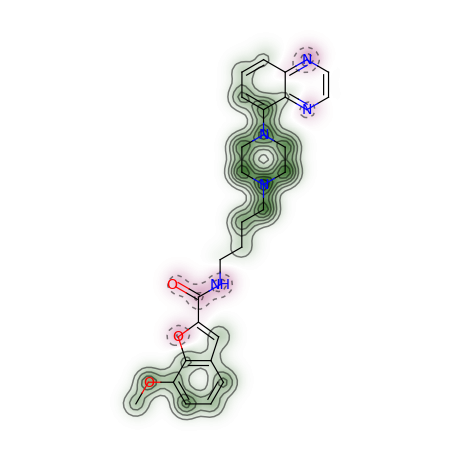

In [32]:
 fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(
     refmol, mol, SimilarityMaps.GetMorganFingerprint)

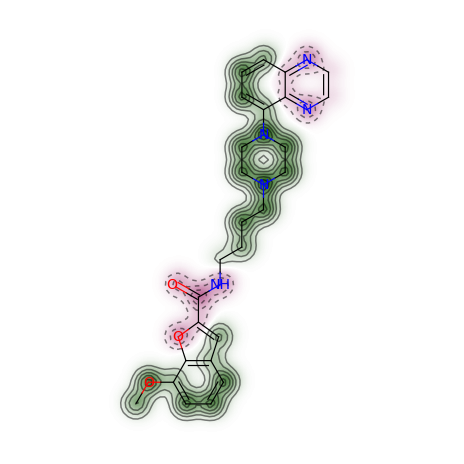

In [33]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(
refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(
m, atomId=idx, radius=1, fpType='count'),
metric=DataStructs.TanimotoSimilarity)

In [34]:
print(maxweight)

0.05747126436781608


['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


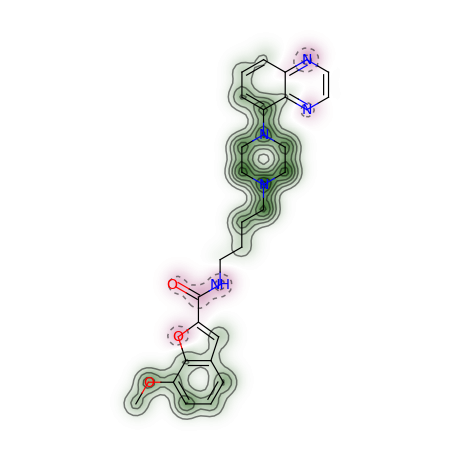

In [35]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
print(["%.2f " % w for w in weights])
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights)

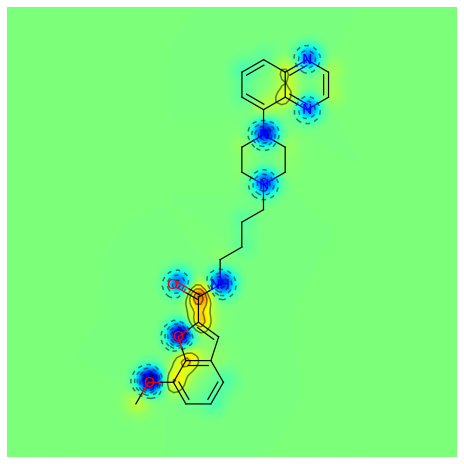

In [36]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(\
c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp(
    '_GasteigerCharge') 
            for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, 
    contribs, colorMap='jet', contourLines=10)